In [ ]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys, glob

In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

import matplotlib.dates as mdates

In [4]:
from datetime import datetime

### Required for google colab

### Setup

In [5]:
DATA_DIR = "../data-ita/dati-regioni"
# DATA_DIR = "../data-ita/dati-province"

## Data loading

In [6]:
csv_files = glob.glob(DATA_DIR + "/*-2020*.csv")

In [7]:
def extract_date(file_name):
    
    # Sample file path:
    # '../data-ita/dati-regioni/dpc-covid19-ita-regioni-20200313.csv'
    
    # Remove file extension
    date_str = os.path.basename(file_name)[:-4]
    
    # Extract last 8 characters
    date_str = date_str[-8:]
    
    date = datetime.strptime(date_str, '%Y%m%d').date()
    
    return date

In [8]:
country_df = None

for csv_file in csv_files:
    
    df = pd.read_csv(csv_file)
    date = extract_date(csv_file)
    df['Date'] = date
    
    if country_df is None:
        country_df = df
    else:
        country_df = pd.concat((country_df, df), ignore_index=True)

In [32]:
np.unique(country_df['denominazione_regione'])

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [9]:
country_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,Date
0,2020-03-22T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,218,49,267,272,539,45,15,33,587,3375,NaN,NaN,2020-03-22
1,2020-03-22T17:00:00,ITA,17,Basilicata,40.639471,15.805148,13,10,23,58,81,15,0,0,81,643,NaN,NaN,2020-03-22
2,2020-03-22T17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,146,32,178,470,648,48,7,23,678,5718,NaN,NaN,2020-03-22
3,2020-03-22T17:00:00,ITA,18,Calabria,38.905976,16.594402,77,17,94,166,260,35,5,8,273,3666,NaN,NaN,2020-03-22
4,2020-03-22T17:00:00,ITA,15,Campania,40.839566,14.250850,243,99,342,524,866,73,41,29,936,4943,NaN,NaN,2020-03-22


In [23]:
def get_region_data(country_df, region_name):
    region_df = country_df[country_df['denominazione_regione'] == region_name].copy()
    
    region_df['casi_su_tamponi'] = region_df['totale_casi']/region_df['tamponi']
    
    return region_df    

In [42]:
regions_list = [
    'Puglia',
    'Calabria',
    'Sicilia',
    'Campania',
    'Calabria',
#     'Lombardia',
]

# provinces_list = [
# #     'Lodi',
#     'Napoli',
# #     'Bari',
# ]

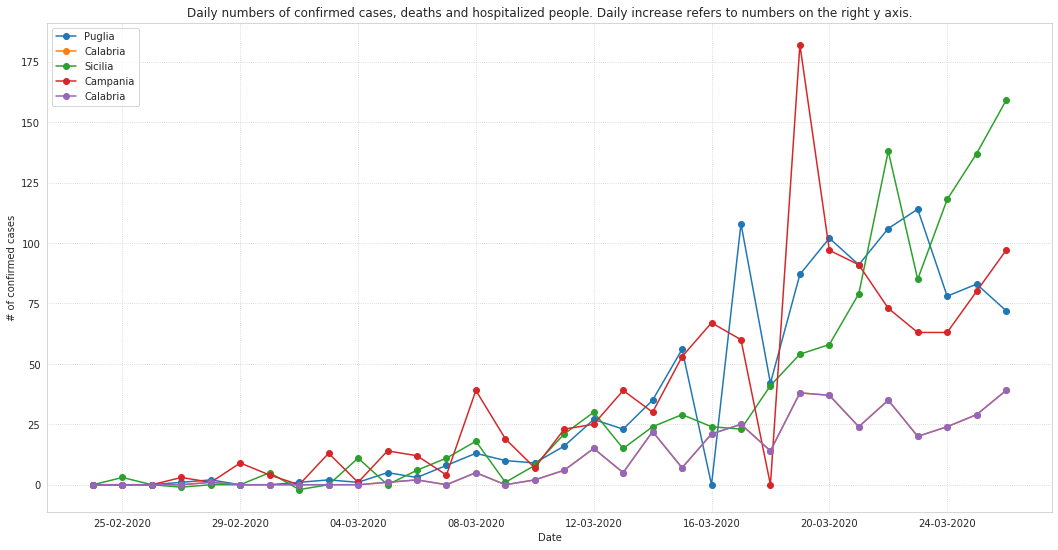

In [43]:
ax = plt.gca()

sns.set_style("whitegrid", {'grid.linestyle': ':'})
# ax.yaxis.set_major_locator(ticker.MultipleLocator(Y_GRID_TICK))
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

for region_name in regions_list:
#     region_df = country_df[country_df['denominazione_regione'] == region_name]
    region_df = get_region_data(country_df, region_name)
    region_df.plot(x='Date', y=["nuovi_attualmente_positivi"], figsize=(18,9), ax=ax, marker='o')
    
    
# region_df = country_df[country_df['denominazione_regione'] == 'Lombardia']
# region_df.plot(x='Date', y=["nuovi_attualmente_positivi"], figsize=(18,9), ax=ax, marker='o', secondary_y=True)
    
# for province_name in provinces_list:
#     province_df = country_df[country_df['denominazione_provincia'] == province_name]
#     province_df.plot(x='Date', y=["totale_casi"], figsize=(18,9), ax=ax, marker='o')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel("# of confirmed cases");

ax.set_title("Daily numbers of confirmed cases, deaths and hospitalized people. Daily increase refers to numbers on the right y axis.");

# ax.legend(provinces_list)
# ax.legend(regions_list+['Lombardia'])
ax.legend(regions_list)

# plt.savefig("regions_daily_data.png");

In [39]:
regions_list = [
    'Puglia',
    'Calabria',
    'Sicilia',
    'Campania',
    'Lombardia',
    'Veneto',
    'Piemonte',
    'Liguria',
    'Emilia Romagna',
]

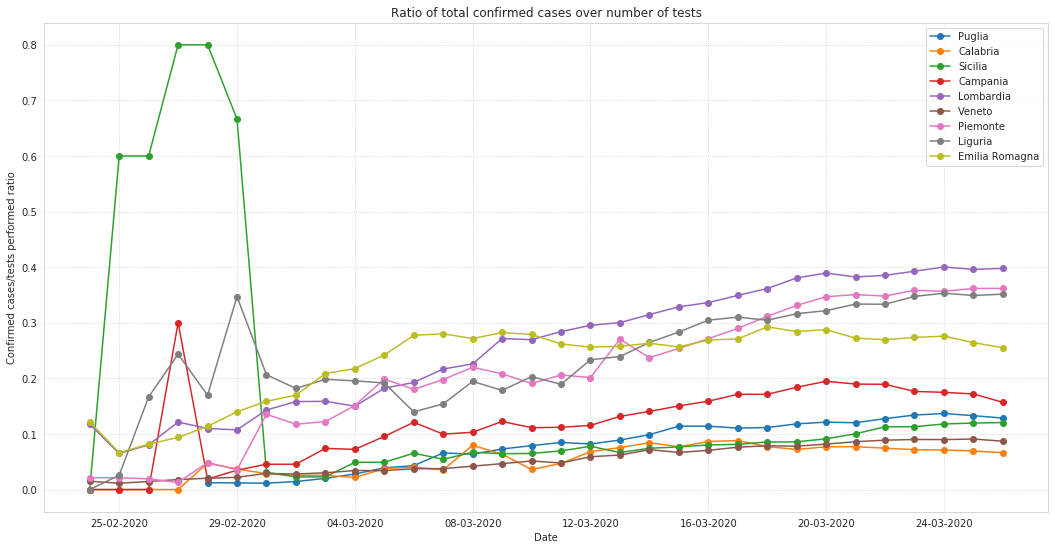

In [40]:
ax = plt.gca()

sns.set_style("whitegrid", {'grid.linestyle': ':'})
# ax.yaxis.set_major_locator(ticker.MultipleLocator(Y_GRID_TICK))
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

for region_name in regions_list:
#     region_df = country_df[country_df['denominazione_regione'] == region_name]
    region_df = get_region_data(country_df, region_name)
    region_df.plot(x='Date', y=["casi_su_tamponi"], figsize=(18,9), ax=ax, marker='o')
    
    
# region_df = country_df[country_df['denominazione_regione'] == 'Lombardia']
# region_df.plot(x='Date', y=["nuovi_attualmente_positivi"], figsize=(18,9), ax=ax, marker='o', secondary_y=True)
    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel("Confirmed cases/tests performed ratio");

ax.set_title("Ratio of total confirmed cases over number of tests");

ax.legend(regions_list);

# plt.savefig("regions_daily_data.png");

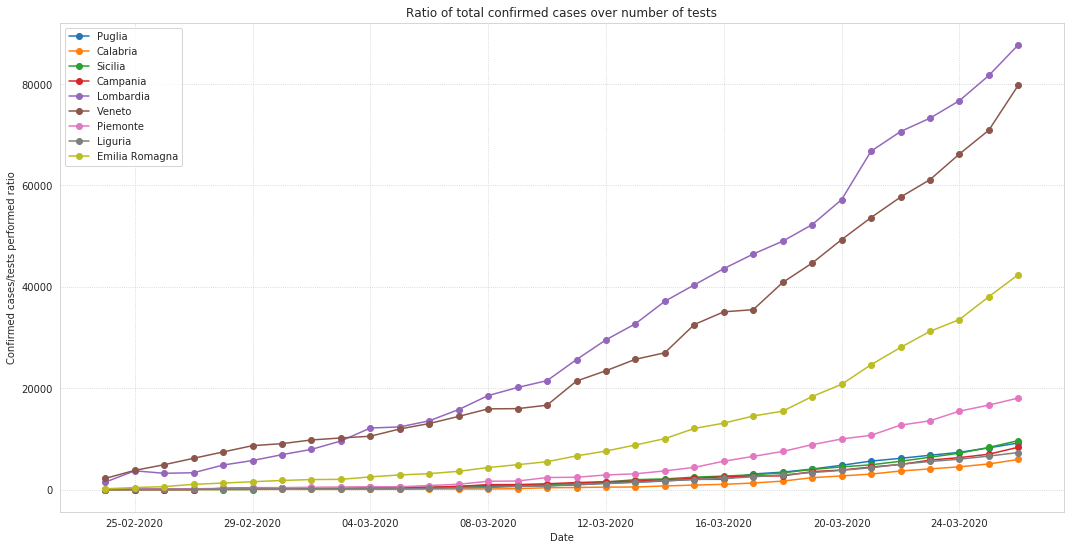

In [41]:
ax = plt.gca()

sns.set_style("whitegrid", {'grid.linestyle': ':'})
# ax.yaxis.set_major_locator(ticker.MultipleLocator(Y_GRID_TICK))
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

for region_name in regions_list:
#     region_df = country_df[country_df['denominazione_regione'] == region_name]
    region_df = get_region_data(country_df, region_name)
    region_df.plot(x='Date', y=["tamponi"], figsize=(18,9), ax=ax, marker='o')
    
    
# region_df = country_df[country_df['denominazione_regione'] == 'Lombardia']
# region_df.plot(x='Date', y=["nuovi_attualmente_positivi"], figsize=(18,9), ax=ax, marker='o', secondary_y=True)
    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel("Confirmed cases/tests performed ratio");

ax.set_title("Ratio of total confirmed cases over number of tests");

ax.legend(regions_list);

# plt.savefig("regions_daily_data.png");